<a href="https://colab.research.google.com/github/Mansipatel21/DLP/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 91ms/step - accuracy: 0.3060 - loss: 1.8654 - val_accuracy: 0.5220 - val_loss: 1.3298
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.5384 - loss: 1.2890 - val_accuracy: 0.6086 - val_loss: 1.1132
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.6165 - loss: 1.0907 - val_accuracy: 0.6346 - val_loss: 1.0363
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.6513 - loss: 0.9903 - val_accuracy: 0.6744 - val_loss: 0.9380
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.6768 - loss: 0.9148 - val_accuracy: 0.6722 - val_loss: 0.9491
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.6937 - loss: 0.8670 - val_accuracy: 0.7030 - val_loss: 0.8710
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 60s 85ms/step - accuracy: 0.7190 - loss: 0.8050 - val_accuracy: 0.6872 - val_loss: 0.9080
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.7376 - loss: 0.7451 - 

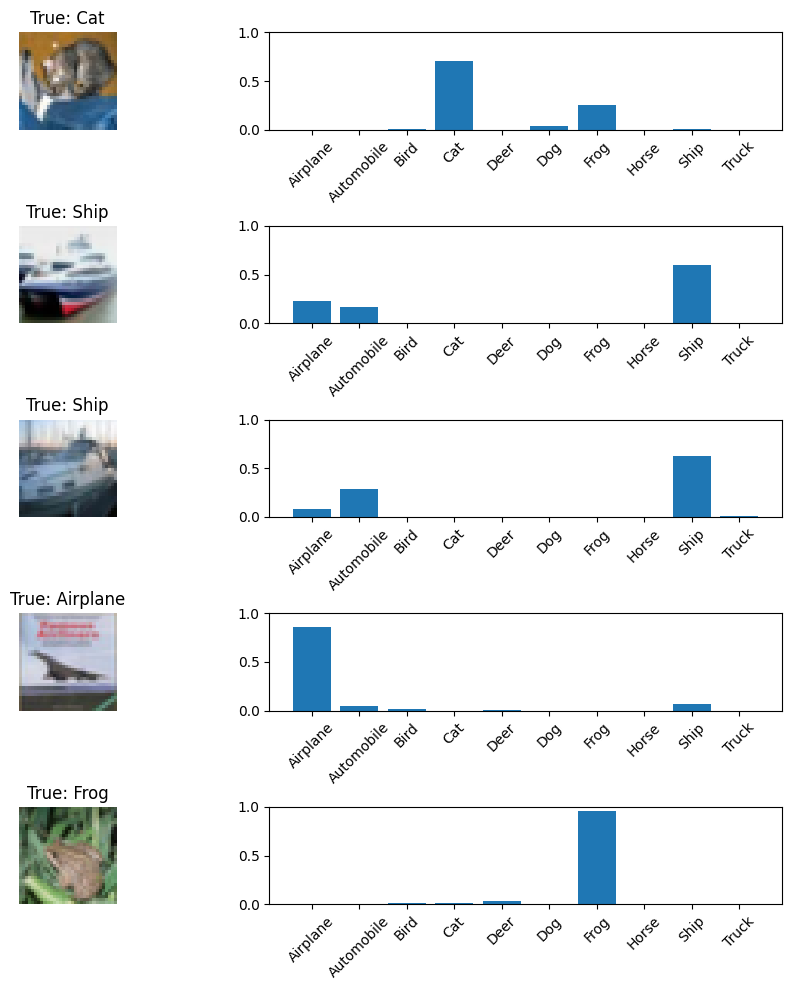

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Make predictions using the trained model
predictions = model.predict(test_images)

# Display a few predictions and their corresponding true labels
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[np.argmax(test_labels[i])]}")
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10), class_names, rotation=45)
    plt.ylim([0, 1])
plt.tight_layout()
plt.show()
